<a href="https://colab.research.google.com/github/barauna-lo/CAP4213-Deep-Learning/blob/main/AT8_CNN_Segmenta%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-421-3: Aprendizado Profundo
## Atividade 8 : 
## **Uso de Rede Convolucional na sementação de imagens no problema de extração de árvores na Floresta Amazônica.**

* Luan Orion Baraúna 

* Vinicius Monego

Prof. Elcio Hideiti Shiguemori



Na proxima célula iremos baixar a pasta do dropbox e iremos dezipar os arquivos que estão dentro dela

In [ ]:
!gdown --id 1wmo1MBTVkFoRbrPOaL4k0XdyrTjQb-IR
!unzip "Classificacao.zip"

Downloading...
From: https://drive.google.com/uc?id=1wmo1MBTVkFoRbrPOaL4k0XdyrTjQb-IR
To: /content/Classificacao.zip
100% 9.61M/9.61M [00:00<00:00, 82.7MB/s]
Archive:  Classificacao.zip
mapname:  conversion of  failed
replace test/11.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Na célula abaixo são mostradas as duas imagens fonte e a imagem alvo correspondente, contendo a segmentação das áreas.

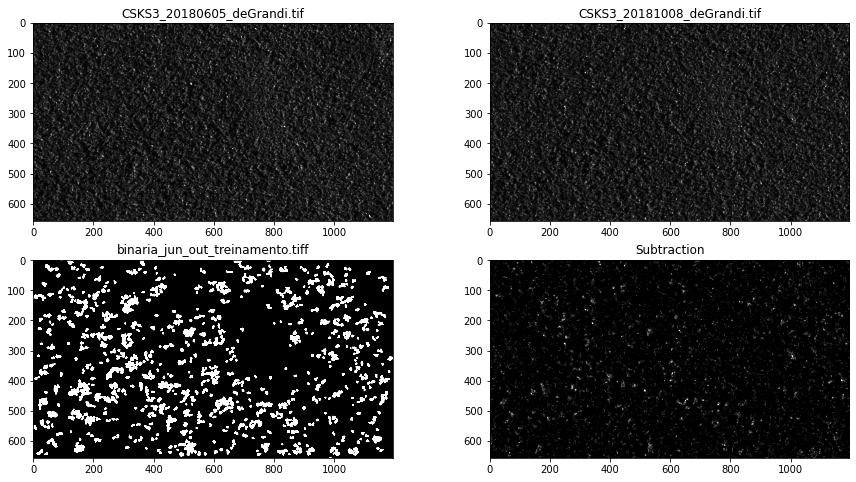

In [ ]:
import matplotlib.pyplot as plt 
import cv2

CS1 = "CSKS3_20180605_deGrandi.tif"
CS2 = "CSKS3_20181008_deGrandi.tif"
CS3 = "binaria_jun_out_treinamento.tiff"

image1 = cv2.imread(CS1, -1)
image2 = cv2.imread(CS2, -1)
image3 = cv2.imread(CS3, -1)

#Creating the figure invariment
plt.figure(figsize=(15,8))

plt.subplot(221)
plt.imshow(image1, cmap = 'gray',vmin=0, vmax=1)
plt.title(str(CS1))

plt.subplot(222)
plt.imshow(image2, cmap = 'gray',vmin=0, vmax=1)
plt.title(str(CS2))

plt.subplot(2,2,3)
plt.imshow(image3, cmap = 'gray',vmin=0, vmax=1)
plt.title(str(CS3))

sub = image2-image1
plt.subplot(2,2,4)
plt.imshow(sub, cmap = 'gray',vmin=0, vmax=0.5) #SUPER SATURADA
plt.title('Subtraction')


plt.show()

In [ ]:
#just cheking the max value of the image

import numpy as np

MAX = []

targt = image1
for i in range(len(targt)):
  MAX.append(max(targt[i]))
max(MAX)

4.1995244

In [ ]:
import os
import tensorflow as tf
import skimage.io as skio
import skimage.color as skc
import skimage.transform as skt
import sklearn.feature_extraction as skfe

Após, as imagens são lidas, convertidas para RGB (para execução no modelo da rede neural), e são extraídos patches de tamanho 32x32 nas duas imagens.

In [ ]:
ims1 = skio.imread('CSKS3_20180605_deGrandi.tif')
ims2 = skio.imread('CSKS3_20181008_deGrandi.tif')
imt = skio.imread('binaria_jun_out_treinamento.tiff')

ims1g = skc.gray2rgb(ims1)
ims2g = skc.gray2rgb(ims2)
imtg = skc.gray2rgb(imt)

In [ ]:
X_train = skfe.image.extract_patches_2d(ims1g, (32, 32), max_patches=12)

In [ ]:
X_val = skfe.image.extract_patches_2d(ims2g, (32, 32), max_patches=12)

In [ ]:
y = skfe.image.extract_patches_2d(imtg, (32, 32), max_patches=12)

Verificando alguns patches:

In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

# Modelo

O modelo utilizado é uma U-Net pré-definida retreinada para o problema em questão.

A U-Net é uma rede de segmentação do tipo encoder-decoder, vista na figura abaixo.

![U-Net](https://www.researchgate.net/publication/332102788/figure/fig2/AS:753454205116418@1556648889776/Modified-U-net-network-structure.jpg)

In [ ]:
%pip install keras-unet

In [ ]:
from keras_unet.models import vanilla_unet

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


O modelo é iniciado tendo as entradas com o tamanho 32x32 e 8 filtros.

In [ ]:
from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=(32, 32, 3),
    use_batch_norm=False,
    num_classes=1,
    filters=8,
    dropout=0.2,
    output_activation='sigmoid')

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
22791/22791 [==============================] - 5041s 221ms/step - loss: 0.0593
Epoch 2/20
19009/22791 [========================>.....] - ETA: 15:16 - loss: 0.0593

In [ ]:
X_train[2].shape

(51, 51, 3)